<a href="https://colab.research.google.com/github/017mori/FarmAI/blob/master/Analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/w870QaH.png)


# Índice

1) [Base de dados](https://raw.githubusercontent.com/017mori/FarmAI/master/Alegrete-RS.csv)

2) Extração dos dados

3) Transformação

4) Dicionário de dados

5) Analise das informcações

6) Modelagem Matemática

7) Resultados


### Análise sobre o preço médio de arroz do RS vs Produtividade do arroz em [Alegrete/RS](https://www.google.com.br/maps/place/Alegrete,+RS/@-29.7913804,-55.8162755,13z/data=!3m1!4b1!4m5!3m4!1s0x95aab9c2b437cc67:0xc5b4ec6e9354f7cd!8m2!3d-29.7906476!4d-55.7954085).



In [269]:
#Para trabalharmos com os bancos de dados
import pandas as pd
import numpy as np

#Para as regreções
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#Para os gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#1) Extração dos dados
##Importando os bancos de dados:
###Sobre o banco de dados
*   Contém variáveis de Produtividade de Arroz Arrigado em [Alegrete/RS](https://www.google.com.br/maps/place/Alegrete,+RS/@-29.7913804,-55.8162755,13z/data=!3m1!4b1!4m5!3m4!1s0x95aab9c2b437cc67:0xc5b4ec6e9354f7cd!8m2!3d-29.7906476!4d-55.7954085); variáveis climáticas; e os valores médio de arroz arrigado por saca de 50kg no RS;  
*   Uma informação util é que o arroz levou 3 meses para ser colhido, logo, todo o banco de dados é um acompanhamento das variáveis durante o período de Novembro de 2019 á Julho de 2020;
*Você pode encontrar os dados no site do [INMET](https://http://sisdagro.inmet.gov.br/sisdagro/app/monitoramento/bhc) e do [AGROLINK](https://www.agrolink.com.br/cotacoes/historico/rs/arroz-irrigado-em-casca-sc-50kg).

---



## Dicionário de dados



1.   PRODUTIVIDADE_FINAL   = % da produtividade resultada da produção;
2.   PERDA_FINAL           = % da perda da produção;
3.   CHUVA_DO_PERIODO      = Quantidade de chuvas em mm no periodo;
4.   TEMPERATURA_MEDIA     = Temperatura média do período em ºC;
5.   MAIOR_TEMPERATURA_MAX = Temperatura máxima do período em ºC;
6.   MENOR_TEMPERATURA_MIN = Temperatura miníma do período em ºC;
7.   Estadual              = Preço médio da saca de 50kg de arroz arrigado em RS; 	
8.   Nacional              = Preço médio da saca de 50kg de arroz arrigado no Brasil.

 

In [270]:
url = "https://raw.githubusercontent.com/017mori/FarmAI/master/Alegrete-RS.csv"
alegrete_df = pd.read_csv(url, sep =";", decimal=",")
alegrete_df.head()

,DATA,PRODUTIVIDADE_FINAL,PERDA_FINAL,TOTAL_DE_DIAS_SEM_CHUVA,CHUVA_DO_PERIODO,TEMPERATURA_MEDIA,MAIOR_TEMPERATURA_MAX,MENOR_TEMPERATURA_MIN,Estadual,Nacional
0,01/01/2018,70.00,29.75,81,483.0,21.10,37.7,7.2,36.63,36.75
1,02/01/2018,45.03,54.97,78,516.0,22.44,37.7,7.2,35.92,35.14
2,03/01/2018,28.04,71.96,85,459.6,23.61,37.7,7.3,34.90,34.25
3,04/01/2018,53.28,46.72,79,564.0,23.94,37.7,10.5,35.32,34.71
4,05/01/2018,55.17,44.83,78,505.2,23.42,35.4,10.5,35.87,35.17


#Análise das variáveis do banco de dados:
---

In [271]:
alegrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA                     31 non-null     object 
 1   PRODUTIVIDADE_FINAL      31 non-null     float64
 2   PERDA_FINAL              31 non-null     float64
 3   TOTAL_DE_DIAS_SEM_CHUVA  31 non-null     int64  
 4   CHUVA_DO_PERIODO         31 non-null     float64
 5   TEMPERATURA_MEDIA        31 non-null     float64
 6   MAIOR_TEMPERATURA_MAX    31 non-null     float64
 7   MENOR_TEMPERATURA_MIN    31 non-null     float64
 8   Estadual                 31 non-null     float64
 9   Nacional                 31 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.5+ KB


#Análise descritiva dos dados:
* Rodamos o comando [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) comando para demonstrar as medidas mais importantes de todas as variáveis.
---

In [272]:
alegrete_df.describe()

,PRODUTIVIDADE_FINAL,PERDA_FINAL,TOTAL_DE_DIAS_SEM_CHUVA,CHUVA_DO_PERIODO,TEMPERATURA_MEDIA,MAIOR_TEMPERATURA_MAX,MENOR_TEMPERATURA_MIN,Estadual,Nacional
count,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,61.69871,38.324839,79.096774,536.743548,20.230323,36.319355,3.787097,43.898065,43.249677
std,20.84381,20.813681,6.415371,196.178171,3.372528,2.875693,4.771355,6.851721,6.403960
min,23.63000,5.370000,70.000000,221.000000,13.540000,29.300000,-3.200000,34.900000,34.250000
25%,48.17500,20.120000,75.000000,447.100000,17.935000,34.900000,-0.550000,40.075000,39.825000
50%,62.15000,37.850000,78.000000,505.200000,21.130000,37.100000,3.300000,43.160000,42.470000
75%,79.88000,51.825000,80.500000,580.000000,23.280000,37.700000,8.600000,45.725000,45.280000
max,94.63000,76.370000,95.000000,1037.600000,24.680000,40.000000,10.500000,62.550000,60.310000


#Visualização dos dados:
* Para não perdermos tempo, eu vou deixar aqui os gráficos das variáveis em que estamos interessados;
---



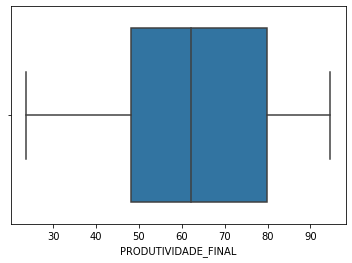

In [273]:
sns.boxplot(x=alegrete_df["PRODUTIVIDADE_FINAL"])

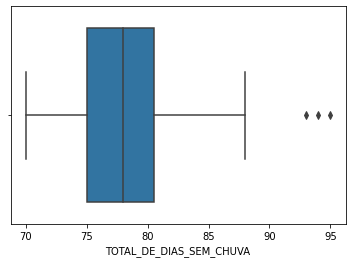

In [274]:
sns.boxplot(x=alegrete_df["TOTAL_DE_DIAS_SEM_CHUVA"])

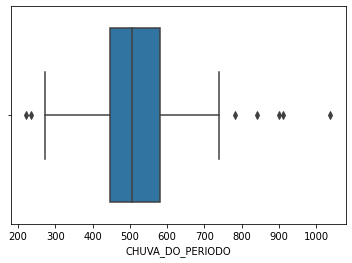

In [275]:
sns.boxplot(x=alegrete_df["CHUVA_DO_PERIODO"])

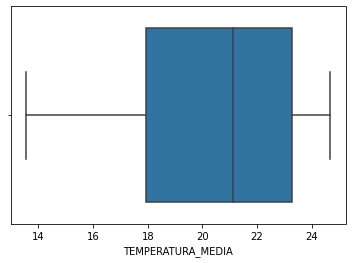

In [276]:
sns.boxplot(x=alegrete_df["TEMPERATURA_MEDIA"])

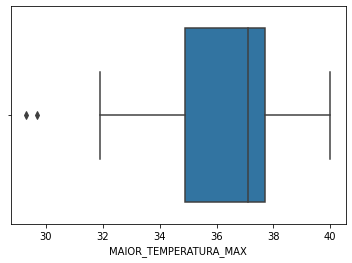

In [277]:
sns.boxplot(x=alegrete_df["MAIOR_TEMPERATURA_MAX"])

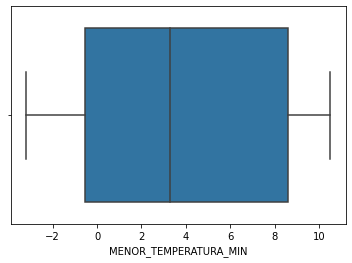

In [278]:
sns.boxplot(x=alegrete_df["MENOR_TEMPERATURA_MIN"])

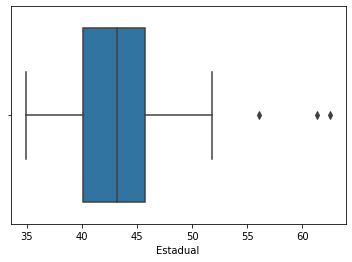

In [279]:
sns.boxplot(x=alegrete_df["Estadual"])

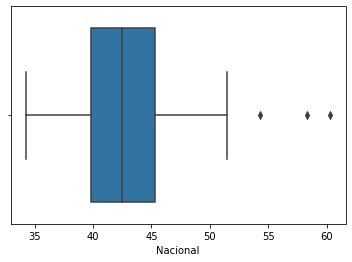

In [280]:
sns.boxplot(x=alegrete_df["Nacional"])

##Retirando os outliers 
Em CHUVA DO PERIDO, TOTAL DE DIAS SEM CHUVA, MAIOR TEMPERATURA MAX, Estadual e Nacional foram identificados outliers, assim vamos substituir os outliers pela mediana - o qual é mais indicado para substituição pois é uma medidada invariante.

In [281]:
#TOTAL_DE_DIAS_SEM CHUVA
median = float(alegrete_df["TOTAL_DE_DIAS_SEM_CHUVA"].median())
alegrete_df["TOTAL_DE_DIAS_SEM_CHUVA"] = np.where(alegrete_df["TOTAL_DE_DIAS_SEM_CHUVA"] > median, median, alegrete_df["TOTAL_DE_DIAS_SEM_CHUVA"])
#CHUVA_DO_PERIODO
median = float(alegrete_df["CHUVA_DO_PERIODO"].median())
alegrete_df["CHUVA_DO_PERIODO"] = np.where(alegrete_df["CHUVA_DO_PERIODO"] > median, median, alegrete_df["CHUVA_DO_PERIODO"])
#MAIOR_TEMPERATURA_MAX
median = float(alegrete_df["MAIOR_TEMPERATURA_MAX"].median())
alegrete_df["MAIOR_TEMPERATURA_MAX"] = np.where(alegrete_df["MAIOR_TEMPERATURA_MAX"] > median, median, alegrete_df["MAIOR_TEMPERATURA_MAX"])
#Estadual
median = float(alegrete_df["Estadual"].median())
alegrete_df["Estadual"] = np.where(alegrete_df["Estadual"] > median, median, alegrete_df["Estadual"])
#Nacional
median = float(alegrete_df["Nacional"].median())
alegrete_df["Nacional"] = np.where(alegrete_df["Nacional"] > median, median, alegrete_df["Nacional"])

###Mais um pouco de visualização dos dados

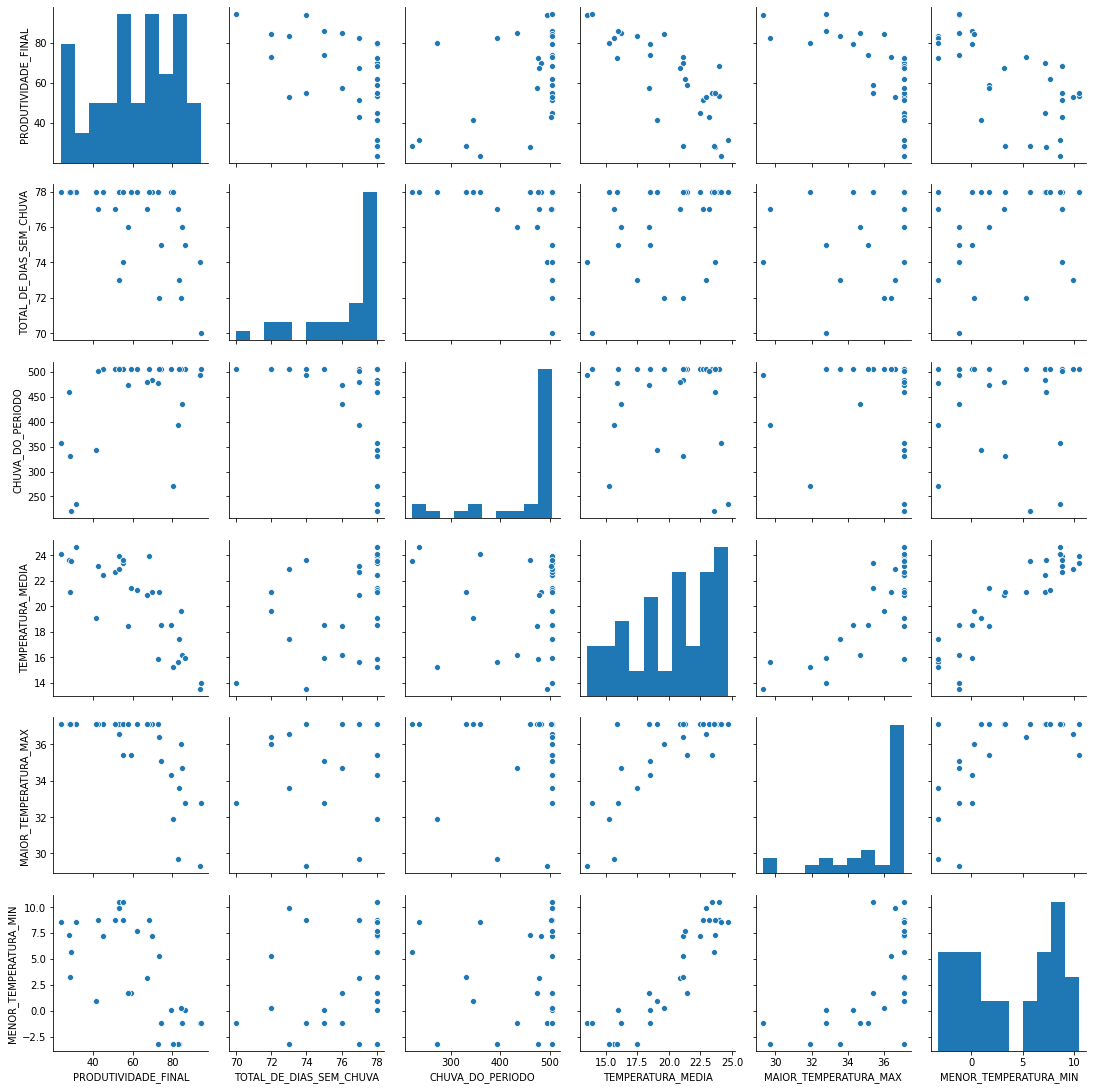

In [282]:
sns.pairplot(alegrete_df[['PRODUTIVIDADE_FINAL', 'TOTAL_DE_DIAS_SEM_CHUVA', 'CHUVA_DO_PERIODO', 'TEMPERATURA_MEDIA', 'MAIOR_TEMPERATURA_MAX', 'MENOR_TEMPERATURA_MIN']])

###Matriz de correlação das variáveis

In [283]:
corr = alegrete_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,PRODUTIVIDADE_FINAL,PERDA_FINAL,TOTAL_DE_DIAS_SEM_CHUVA,CHUVA_DO_PERIODO,TEMPERATURA_MEDIA,MAIOR_TEMPERATURA_MAX,MENOR_TEMPERATURA_MIN,Estadual,Nacional
PRODUTIVIDADE_FINAL,1.00,-1.00,-0.54,0.46,-0.79,-0.69,-0.66,0.20,0.22
PERDA_FINAL,-1.00,1.00,0.54,-0.46,0.79,0.69,0.66,-0.20,-0.22
TOTAL_DE_DIAS_SEM_CHUVA,-0.54,0.54,1.00,-0.39,0.38,0.33,0.28,-0.38,-0.38
CHUVA_DO_PERIODO,0.46,-0.46,-0.39,1.00,-0.08,-0.01,0.07,-0.37,-0.35
TEMPERATURA_MEDIA,-0.79,0.79,0.38,-0.08,1.00,0.78,0.91,-0.42,-0.43
MAIOR_TEMPERATURA_MAX,-0.69,0.69,0.33,-0.01,0.78,1.00,0.66,-0.25,-0.25
MENOR_TEMPERATURA_MIN,-0.66,0.66,0.28,0.07,0.91,0.66,1.00,-0.45,-0.45
Estadual,0.20,-0.20,-0.38,-0.37,-0.42,-0.25,-0.45,1.00,1.00
Nacional,0.22,-0.22,-0.38,-0.35,-0.43,-0.25,-0.45,1.00,1.00


#Regressão Linear:
* Aqui podemos ver todas as relações em que o nÍvel de produção tem em relação as outras variáveis.
---



0


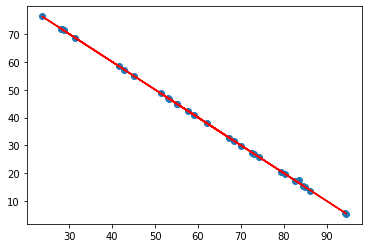

coefficient of determination: 0.9999248211905215
intercept: [99.93205005]
slope: [[-0.99851701]]


1


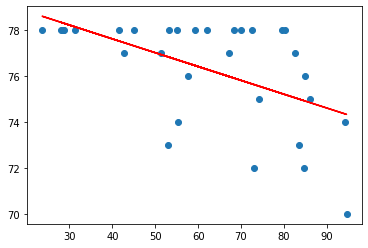

coefficient of determination: 0.2942829679425635
intercept: [80.03989328]
slope: [[-0.06024944]]


2


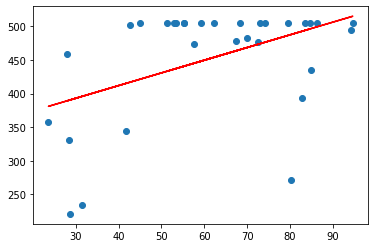

coefficient of determination: 0.20732568289845998
intercept: [336.41833978]
slope: [[1.88851205]]


3


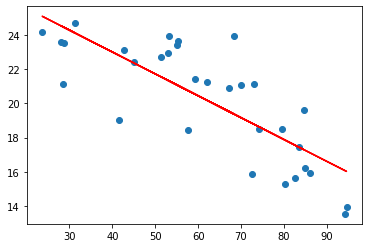

coefficient of determination: 0.6232647287349642
intercept: [28.11149419]
slope: [[-0.12773641]]


4


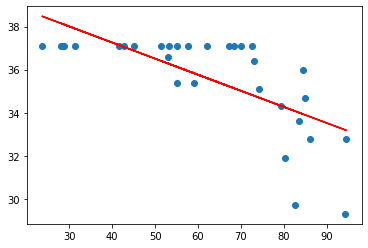

coefficient of determination: 0.48161558313186814
intercept: [40.23975668]
slope: [[-0.07462511]]


5


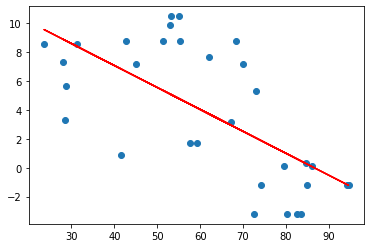

coefficient of determination: 0.44072397705261196
intercept: [13.16323595]
slope: [[-0.15196654]]


6


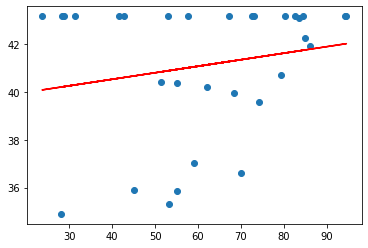

coefficient of determination: 0.03991362892042227
intercept: [39.43752905]
slope: [[0.02722732]]


7


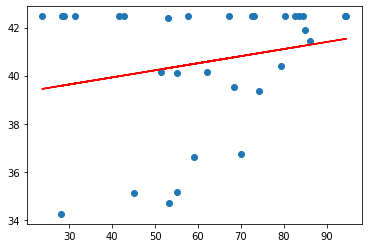

coefficient of determination: 0.049008517225658466
intercept: [38.75253123]
slope: [[0.02940488]]


In [284]:
#Para cada variável estamos relacionando com o nível de produtividade
for i in range(8):
  print("")
  print("")
  print(i)
  x = alegrete_df.iloc[:,1]
  y = alegrete_df.iloc[:,i+2]

  x = x[:, np.newaxis]
  y = y[:, np.newaxis]

  model = LinearRegression()
  model.fit(x, y)
  y_pred = model.predict(x)
  r_sq = model.score(x, y)

  plt.scatter(x, y)
  plt.plot(x, y_pred, color='r')
  plt.show()
  print('coefficient of determination:', r_sq)
  print('intercept:', model.intercept_)
  print('slope:', model.coef_)

###OBS.: Como observamos na matriz de correlação as variaveis que detem a mair relação entre a variável Produção Final são TOTAL_DE_DIAS_SEM_CHUVA, TEMPERATURA_MEDIA, MAIOR_TEMPERATURA_MAX e MENOR_TEMPERATURA_MIN com  -0.54, -0.79, -0.69 e -0.66 respectivamente.
---


#Regreção Linear Multipla 
* Sabendo que a maioria das variáveis tem alguma relação com o nível de produtividade, então resolvemos implementar a RLM para demonstrar que a maioria das variáveis estão relacionadas com o nível de produtividade.
---

In [288]:
#Definindo o data set
alegrete_df_clean = alegrete_df
alvo = alegrete_df_clean["PRODUTIVIDADE_FINAL"]
inputs = alegrete_df_clean.drop(["PRODUTIVIDADE_FINAL", "PERDA_FINAL", "DATA", "Nacional"] , axis=1)

In [289]:
#Normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)
scaled_inputs = preprocessing.scale(inputs)

In [292]:
#Gerando o modelo de regressão e preenchendo com as variáveis
reg = LinearRegression()
reg.fit(scaled_inputs, alvo) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [293]:
y_hat = reg.predict(inputs)

Text(0.5, 1.0, 'Redidual')

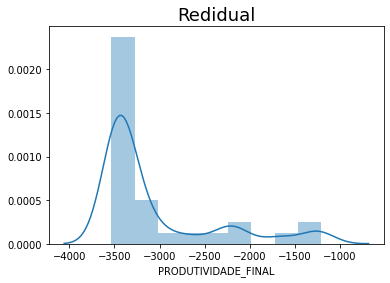

In [294]:
sns.distplot(alvo - y_hat)
plt.title("Redidual", size=18)

In [295]:
reg.intercept_

61.69870967741937

In [296]:
reg.coef_

array([-2.32883316,  7.93063753, -8.56952948, -5.20367269, -2.15212951,
        0.24924936])

In [297]:
reg.predict(scaled_inputs)
predito = reg.predict(scaled_inputs)
reg.predict(scaled_inputs)

array([ 55.11902151,  53.66468969,  46.25348084,  48.22362172,
        53.62788865,  62.87963908,  75.72997766,  75.29756693,
       102.62342098,  98.44632727,  87.40719406,  74.1306021 ,
        56.86510444,  53.60421069,  49.44188078,  54.37051656,
        58.0224065 ,  66.35302274,  73.46405209,  85.36079171,
        84.74648496,  68.11327682,  73.39360089,  66.3257722 ,
        58.75334757,  52.49295497,  35.52494708,  22.68597352,
        25.6288907 ,  43.18618736,  50.92314791])

##Verificacao do modelo

## R ao quadrado

Quanto mais proximo de 1 for o R ao quadrado, melhor representa o modelo matematico com o observado.

In [298]:
reg.score(scaled_inputs ,alvo)

0.8158845645915173

Nosso R ao quadrado chegou a 0.875, sendo um valor bom.

## Erro Quadrático Médio

O M.S.E. é a média do quadrado do desvio entre os valores preditos e os observados, opta-se para escolha de um valor baixo para SME.

In [299]:
from sklearn.metrics import mean_squared_error
mean_squared_error(alvo, predito)

77.41122879306165

##Erro Percentual Absoluto médio

O MAPE é a média de todos os erros absolut percetuais e indica a média do erro absoluto em termos percentuais, independete se este erro for negativo ou posivivo, assim quanto menor for o MAPE mais acurado é o modelo

In [300]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(alvo, predito)

15.072927726549187

Analisando o MAPE da regressâo temos um valor ótimo, sendo que aglumas literaturas identificam como bom <= a 50

In [301]:
def desvio_medio_absoluto(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sum(np.abs((y_pred - y_true))) * len(y_true)

desvio_medio_absoluto(alvo, predito)

6938.744499196617

##BIAS

Bias é o erro sistemático associado à análise. Ele mede a tendência de o modelo suprestimar ou substmar o valor predito em relação ao valor observado.

In [302]:
def bias(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sum(((y_pred - y_true))) * len(y_true)

bias(alvo, predito)

1.233502189279534e-11

O valor do BIAS da regressão deu zero sendo um excelente

#Regressão Polinomial
* Mas como o foco é o preço médio da saca de arrroz vs o nível de produtividade, logo, vamos realizar uma regreção polinimial para identificar com mais clareza a relação não lienar que essa variáveis detem, visto em gráficos anteriores.
---


In [303]:
#Importando os dados para as variáveis
X = np.array(alegrete_df.iloc[:,1]).reshape((-1, 1))
Y = np.array(alegrete_df.iloc[:,3:9])

#Caso queira normalizar os dados antes de colocalos no modelo
#X_scaled = preprocessing.scale(x)
#Y_scaled = preprocessing.scale(y)

#Trnasformando os dados de entrada
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X) ##include_bias=True

#Criando modelo e o fit
model = LinearRegression().fit(x_, Y)

#Respostas do Modelo de RPM
r_sq = model.score(x_, Y)
intercept2, coefficients2 = model.intercept_, model.coef_

print('coefficient of determination:', r_sq)
print("")
print('intercept:', model.intercept_)
print("")
print('coefficients:', model.coef_)

coefficient of determination: 0.38852119987335804

intercept: [76.19607153 64.46304076 20.04459424 33.29359586  2.06384676 46.98748588]

coefficients: [[ 8.82289718e-02 -1.25783722e-03]
 [ 1.23935493e+01 -8.89935904e-02]
 [ 1.83870258e-01 -2.63978085e-03]
 [ 1.93689864e-01 -2.27303455e-03]
 [ 2.76778545e-01 -3.63212079e-03]
 [-2.64410970e-01  2.47061840e-03]]


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


###OBS.: Podemos observar que o nosso R² para o modelo de RPM foi muito baixo, sendo R² = 0,2675. Portanto esse modelos não é tão adequado para esses dados.
---   

###Predição dos dados pelo modelo de RPM

In [304]:
X = np.array(alegrete_df.iloc[:,1])
Y = np.array(alegrete_df.iloc[:,3:9])
y_pred = model.predict(x_)


###Medidads para a validação do modelo

In [305]:
mean_squared_error(Y, y_pred)

742.2935806488935

In [306]:
mean_absolute_percentage_error(Y, y_pred)

35.147561265691564

In [307]:
desvio_medio_absoluto(Y, y_pred)

54631.405818122854

In [308]:
bias(Y, y_pred)

-1.638795765757095e-10

#Resultados

* Aqui apresentaremos as diferenças entre os dois modelos

## Comparativo

* Segue uma analise comparativa entre os dois modelos matematicos 

In [309]:
print("    ", "RPM"," ", "RLM")
print("R^2  ", str(r_sq)[:4], str(reg.score(scaled_inputs ,alvo))[:4])
print("MSE  ", str(mean_squared_error(Y, y_pred))[:4], str(mean_squared_error(alvo, predito))[:4])
print("MAPE ", str(mean_absolute_percentage_error(Y, y_pred))[:4], str(desvio_medio_absoluto(alvo, predito))[:4])
print("MAD ", str(desvio_medio_absoluto(Y, y_pred))[:4], str(desvio_medio_absoluto(alvo, predito))[:4])
print("Bias", str(bias(Y, y_pred))[:4], str(bias(alvo, predito))[:4])

     RPM   RLM
R^2   0.38 0.81
MSE   742. 77.4
MAPE  35.1 6938
MAD  5463 6938
Bias -1.6 1.23


###Portanto a modelagem matematica de melhor acuracidade é a REGRESSÃO LINEAR MULTIPLA, pois contempla um R² maior.
---


#Programa


Aqui iremos fazer um exemplo dos dados de entrada para o sistema:

In [310]:
data_cutivo = '11/01/2020'
tipo_cutivo = "arroz ciclo 120d"
previsao_preco_saca = 43
ha = 12
data_teste = { 'TOTAL_DE_DIAS_SEM_CHUVA' :[78],
        'CHUVA_DO_PERIODO': [477],
        'TEMPERATURA_MEDIA': [15],
        'MAIOR_TEMPERATURA_MAX':  [22],
        'MENOR_TEMPERATURA_MIN':  [10],
        "Nacional": [previsao_preco_saca]
        }
teste = pd.DataFrame (data_teste, columns =['TOTAL_DE_DIAS_SEM_CHUVA', 'CHUVA_DO_PERIODO', 'TEMPERATURA_MEDIA','MAIOR_TEMPERATURA_MAX', 'MENOR_TEMPERATURA_MIN',  "Nacional" ])
teste.head()
scaled_teste = preprocessing.scale(teste)


text_sucesso = ("Previsão de sucesso da produção em: %s ") % (str(reg.predict(scaled_teste)[0])[:5])
previsao = reg.predict(scaled_teste)[0]
min_saca = 105
max_saca = 150
text_valor_gerado = ("Valor da produção de R$: %s a R$:%s") % ((ha*min_saca*previsao), (ha*max_saca*previsao))
print(text_sucesso)
print(text_valor_gerado)

Previsão de sucesso da produção em: 61.69 
Valor da produção de R$: 77740.37419354841 a R$:111057.67741935488
